# Housing Price Regressor

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [9]:
Y_train.shape, Y_valid.shape, Y_test.shape

((11610,), (3870,), (5160,))

In [10]:
X_train.shape[1:], X_train.shape[1] 

((8,), 8)

In [11]:
model = keras.models.Sequential([
  # keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1]),
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(30, activation="relu", input_shape=[8]))
# model.add(keras.layers.Dense(30, activation="relu"))
# model.add(keras.layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [14]:
model_history = model.fit(X_train, Y_train,
                         epochs=30,
                         validation_data=(X_valid, Y_valid))

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 363}

In [16]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506,
  0.39491623640060425,
  0.392380952835083,
  0.3898072838783264,
  0.3874099850654602,
  0.38507524132728577,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769364356994629,
  0.37497687339782715],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.4

In [17]:
mse_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3727 - mae: 0.4346


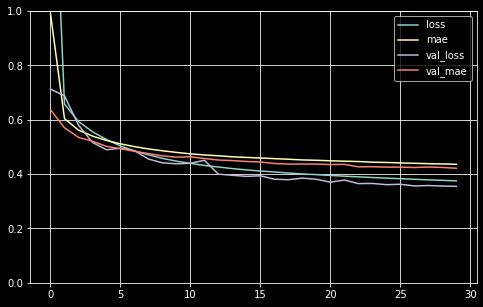

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [19]:
X_new = X_test[:3]

In [20]:
y_pred = model.predict(X_new)

In [21]:
print(y_pred)

[[0.5808525]
 [1.9019514]
 [3.6079109]]


In [22]:
print(Y_test[:3])

[0.477   0.458   5.00001]


# Callbacks and saving model after every epoch

In [23]:
del model

In [24]:
keras.backend.clear_session()

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [27]:
model.compile(loss='mse',
             optimizer = keras.optimizers.SGD(lr=1e-3))

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Sequential_Model_Housing_Price_Regressor/Model-{epoch:02d}.h5")

In [29]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint_cb]) 

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [30]:
del model
keras.backend.clear_session()

In [31]:
model = keras.models.load_model("Sequential_Model_Housing_Price_Regressor/Model-10.h5")

In [32]:
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4382
0.438228577375412


# Saving Best Model Only

In [33]:
del model
keras.backend.clear_session()

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss='mse',
             optimizer = keras.optimizers.SGD(lr=1e-3))

In [37]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Sequential_Model_Housing_Price_Regressor/Best_Model.h5", save_best_only=True)

In [38]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint_cb]) 

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [39]:
model = keras.models.load_model("Sequential_Model_Housing_Price_Regressor/Best_Model.h5")

In [40]:
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4382
0.438228577375412


# Saving Best Model from a large numer of epochs

In [41]:
del model
keras.backend.clear_session()

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [44]:
model.compile(loss='mse',
             optimizer = keras.optimizers.SGD(lr=1e-3))

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Sequential_Model_Housing_Price_Regressor/Early_Stop_Model.h5", save_best_only=True)

In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
#patience number of epochs till which their is no imporvement and training should stop

In [47]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_lo

In [48]:
model = keras.models.load_model("Sequential_Model_Housing_Price_Regressor/Early_Stop_Model.h5")

In [50]:
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3343
0.3342573642730713
